<a href="https://colab.research.google.com/github/Bhamare04/Stock-Price-Prediction/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Here we need to import the necessary libraries for the project
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# 1.Problem Definition & Data Collection :

In [2]:
#Here we took the live Past data of AAPL ticker
TICKER = "AAPL"

df = yf.download(
    TICKER,
    start="2014-01-01",
    end="2025-01-01",
    progress=False
)

/tmp/ipython-input-3171025029.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(


In [3]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2014-01-02,17.156700,17.277669,17.122271,17.235795,234684800
2014-01-03,16.779840,17.174382,16.762780,17.148328,392467600
2014-01-06,16.871340,16.960359,16.550929,16.670347,412610800
2014-01-07,16.750685,16.934307,16.684928,16.883439,317209200
2014-01-08,16.856764,16.921900,16.708811,16.712531,258529600
...,...,...,...,...,...
2024-12-24,257.037476,257.047410,254.140559,254.339671,23234700
2024-12-26,257.853760,258.928914,256.470034,257.027510,27237100


In [4]:
#Here are the columns present in the above data we taken.
#Open – Opening price
#High – Highest price of the day
#Low – Lowest price of the day
#Close – Closing price
#Adj Close – Adjusted for splits/dividends
#Volume – Trading volume

# 2.EDA:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2768 entries, 2014-01-02 to 2024-12-31
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   2768 non-null   float64
 1   (High, AAPL)    2768 non-null   float64
 2   (Low, AAPL)     2768 non-null   float64
 3   (Open, AAPL)    2768 non-null   float64
 4   (Volume, AAPL)  2768 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 129.8 KB


In [6]:
#As we see there is no single null value present in the data.
df.isna().sum()

,,0
Price,Ticker,
Close,AAPL,0
High,AAPL,0
Low,AAPL,0
Open,AAPL,0
Volume,AAPL,0


In [7]:
#Let's see the close price of the stock market using the visualization technique.

Text(0, 0.5, 'Price')

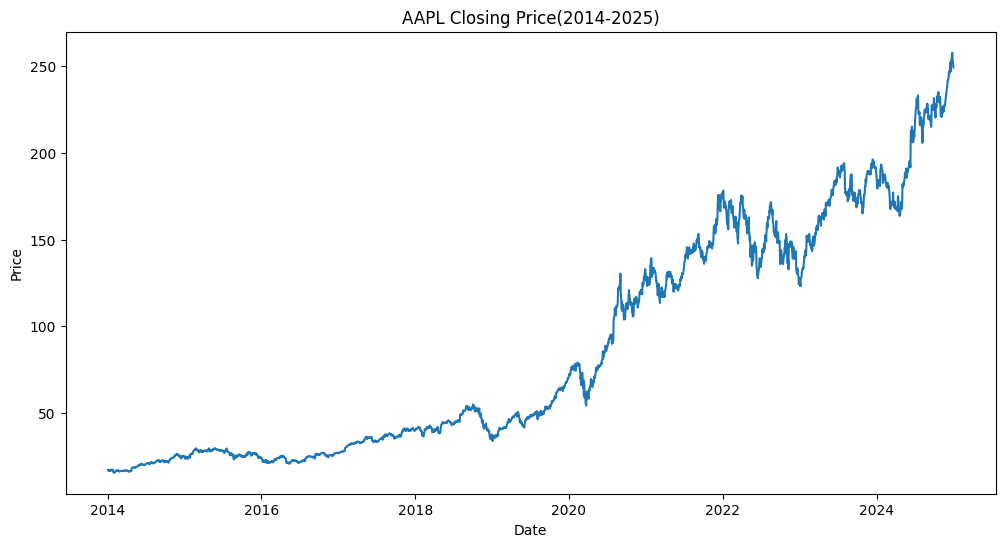

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'])
plt.title(f'{TICKER} Closing Price(2014-2025)')
plt.xlabel('Date')
plt.ylabel('Price')

In [9]:


#What we observe here is
#Long-term upward trend
#Big drops (COVID, 2022 tech crash)
#Volatility clusters

In [10]:
df.to_csv("AAPL_raw_data.csv")


In [11]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2768.000000,2768.000000,2768.000000,2768.000000,2.768000e+03
mean,87.160853,88.004357,86.223666,87.081034,1.294236e+08
std,65.889882,66.494813,65.192180,65.810367,8.383536e+07
min,15.501921,15.556201,15.308681,15.359240,2.323470e+07
25%,28.101933,28.308243,27.885372,28.091246,7.426440e+07
50%,51.220846,52.032161,50.846567,51.367710,1.061800e+08
75%,146.059856,147.667252,144.625594,145.851528,1.614288e+08
max,257.853760,258.928914,256.470034,257.027510,1.065523e+09


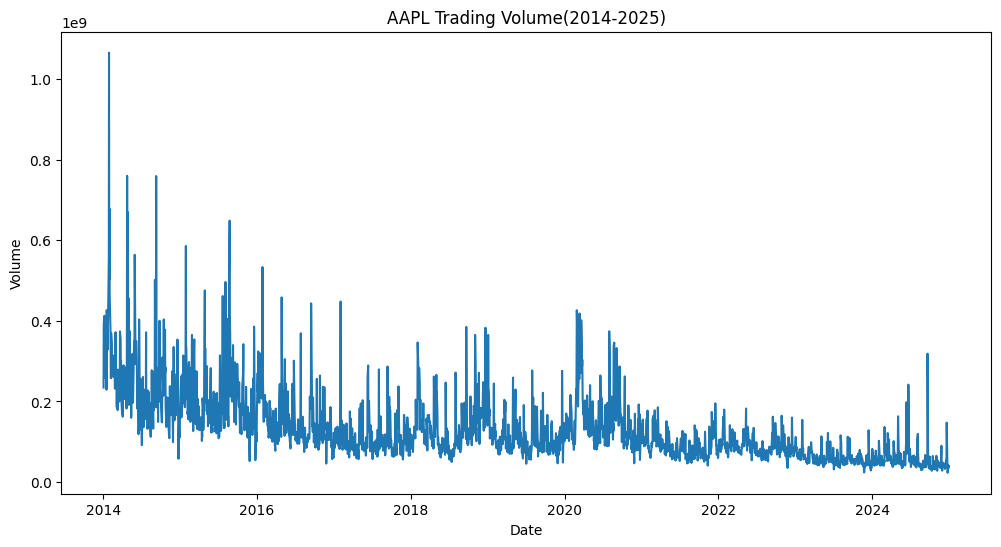

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(df['Volume'])
plt.title(f'{TICKER} Trading Volume(2014-2025)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

In [13]:
#Here we see the graph of date vs volume
#Volume spikes = big news / big moves.

In [14]:

df['Daily_Return'] = df['Close'].pct_change()

In [15]:
df=df.dropna()

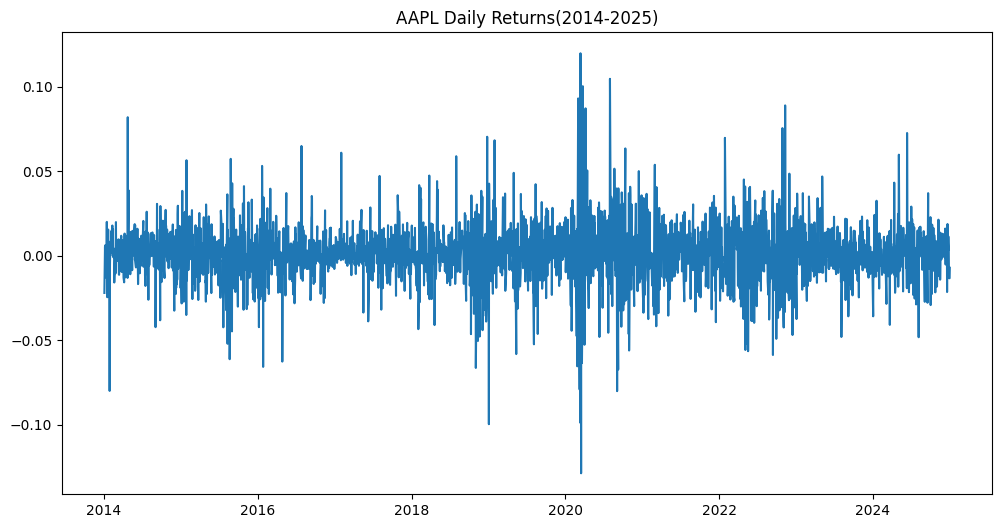

In [16]:
plt.figure(figsize=(12, 6))
plt.plot(df['Daily_Return'])
plt.title(f'{TICKER} Daily Returns(2014-2025)')
plt.show()

# 3.feature Enginnering:

In [17]:
pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=40315c323193e21e98c1df673ee66a01f9f4764853f7021865b67d5c005ad1f8
  Stored in directory: /root/.cache/pip/wheels/5c/a1/5f/c6b85a7d9452057be4ce68a8e45d77ba34234a6d46581777c6
Successfully built ta


In [18]:
from ta.trend import SMAIndicator,EMAIndicator

In [19]:
df = df.copy()
df['SMA_20'] = SMAIndicator(df[('Close', 'AAPL')], window=20).sma_indicator()
df['SMA_50'] = SMAIndicator(df[('Close', 'AAPL')], window=50).sma_indicator()
df['EMA_20'] = EMAIndicator(df[('Close', 'AAPL')], window=20).ema_indicator()

In [20]:
#These capture trend.

In [21]:
from ta.momentum import RSIIndicator

df['RSI'] = RSIIndicator(df['Close','AAPL'], window=14).rsi()
#RSI:
#<30 → Oversold
#70 → Overbought

In [22]:
df['Volatility'] = df['Daily_Return'].rolling(window=20).std()
#Markets move in regimes. Volatility matters.


In [23]:
df['Target'] = df['Close'].shift(-1)
df = df.dropna()


In [24]:
df[['Close','SMA_20','SMA_50','EMA_20','RSI','Volatility','Target']].corr()
#We’re checking:
#Features relate to target
#No completely useless columns


,Price,Close,SMA_20,SMA_50,EMA_20,RSI,Volatility,Target
,Ticker,AAPL,,,,,,
Price,Ticker,,,,,,,
Close,AAPL,1.000000,0.997771,0.994356,0.998386,-0.014046,0.044553,0.999605
SMA_20,,0.997771,1.000000,0.997911,0.999884,-0.062234,0.053362,0.997415
SMA_50,,0.994356,0.997911,1.000000,0.998025,-0.090478,0.071595,0.994023
EMA_20,,0.998386,0.999884,0.998025,1.000000,-0.056347,0.053720,0.998028
RSI,,-0.014046,-0.062234,-0.090478,-0.056347,1.000000,-0.285091,-0.014191
Volatility,,0.044553,0.053362,0.071595,0.053720,-0.285091,1.000000,0.044219
Target,,0.999605,0.997415,0.994023,0.998028,-0.014191,0.044219,1.000000


In [25]:
df.to_csv("AAPL_features_day2.csv")


In [26]:
# Price trends, volume, and daily returns were analyzed to study market behavior.
# Technical indicators like moving averages, RSI, and volatility were created.
# The target variable was set as the next day’s closing price, and the final
# dataset was prepared for model training.

# 4.Model Building:

In [27]:
features = ['Close','SMA_20','SMA_50','EMA_20','RSI','Volatility']
x=df[features]
y=df['Target']

split=int(0.8*len(df))
x_train,x_test=x[:split],x[split:]
y_train,y_test=y[:split],y[split:]
#Selected key technical indicators as features and performed an 80–20 chronological
#train-test split to prepare time-series data for predictive modeling

In [28]:
from sklearn import linear_model
#After spliting our data into testing and training
#We use the Regression model for evaluation
#We use Linear Regression model for evalution.
# 1.Linear Regression.
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression()
linear_model.fit(x_train,y_train)

lr_pred=linear_model.predict(x_test)

In [29]:
#Lets evaluate a model with evaluation metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [30]:
MSE=mean_squared_error(y_test,lr_pred)
print("mean squared error :",MSE)

MAE=mean_absolute_error(y_test,lr_pred)
print("mean absolute error :",MAE)

R2=r2_score(y_test,lr_pred)
print("r2 score :",R2)

mean squared error : 6.903736277786548
mean absolute error : 1.9431828593854996
r2 score : 0.9923243939632298


In [31]:
#Here above we clearly see the model behaviour is good i.e the R2 score of a model is 0.99%

In [32]:
# 2. Random Forest
#Why we use Random Forest?
#Captures non-linear relationships
#Handles noise well
#Very popular in financial ML

In [33]:
from sklearn.ensemble import RandomForestRegressor

rf_model=RandomForestRegressor()
rf_model.fit(x_train,y_train)
rf_pred=rf_model.predict(x_test)

In [34]:
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_rmse = mean_squared_error(y_test, rf_pred)
R2=r2_score(y_test,rf_pred)
print("Random Forest MAE:", rf_mae)
print("Random Forest RMSE:", rf_rmse)
print("r2 score :",R2)


Random Forest MAE: 20.20392888517941
Random Forest RMSE: 916.9358237168484
r2 score : -0.019453504690996715


In [35]:
#Now lets see the feature importance of both the models
importance=pd.Series(rf_model.feature_importances_,index=features).sort_values(ascending=False)
print(importance)

Close         0.282993
EMA_20        0.275853
SMA_20        0.246857
SMA_50        0.193826
Volatility    0.000299
RSI           0.000172
dtype: float64


In [36]:
#The above method tells us that
#Which indicators matter most
#Whether features are meaningful

In [37]:
#After applying the various models now we will use the deep learning model
#i.e LSTM(Long -short term memory)
#for that we have to scale the data
#Import the library
from sklearn.preprocessing import MinMaxScaler
 #We’ll use Close price only for LSTM (simple & effective):
data = df[['Close']].values
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)


In [38]:
#We’ll use last 60 days to predict the next day.
def create_sequences(data, window_size=60):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X, y = create_sequences(scaled_data, 60)


In [39]:
#Reshape for LSTM:
X = X.reshape(X.shape[0], X.shape[1], 1)


In [40]:
split = int(0.8 * len(X))

X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [54]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))


model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
#what dropout does Randomly turns off 20% neurons during training
#What Dense(1) means
#Fully connected layer
#Outputs exactly one number
#LSTM (Long Short-Term Memory)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [55]:
history = model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test)
)
#Epoch = one full pass through all training data
#it means sees entire dataset 20 times.

Epoch 1/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 9s 70ms/step - loss: 0.0163 - val_loss: 0.0011
Epoch 2/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - loss: 0.0012 - val_loss: 7.3103e-04
Epoch 3/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 9s 60ms/step - loss: 8.7888e-04 - val_loss: 7.7230e-04
Epoch 4/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - loss: 9.0719e-04 - val_loss: 0.0010
Epoch 5/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 9.1958e-04 - val_loss: 7.8965e-04
Epoch 6/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 66ms/step - loss: 7.8979e-04 - val_loss: 0.0016
Epoch 7/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - loss: 8.1800e-04 - val_loss: 0.0031
Epoch 8/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - loss: 8.4597e-04 - val_loss: 7.2345e-04
Epoch 9/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - loss: 8.9399e-04 - val_loss: 0.0020
Epoch 10/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 6.7999e-04 - val_loss: 0.0014
Epoch 11/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 6.2301e-04 - val_loss: 0.0010
Epoch 12/20

In [56]:
predictions = model.predict(X_test)
#Convert predictions back to original price scale:
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


In [57]:
#now we evaluate LSTM model
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test_actual, predictions)
rmse = mean_squared_error(y_test_actual, predictions)

print("LSTM MAE:", mae)
print("LSTM RMSE:", rmse)


LSTM MAE: 4.364899671167359
LSTM RMSE: 31.595554233416525


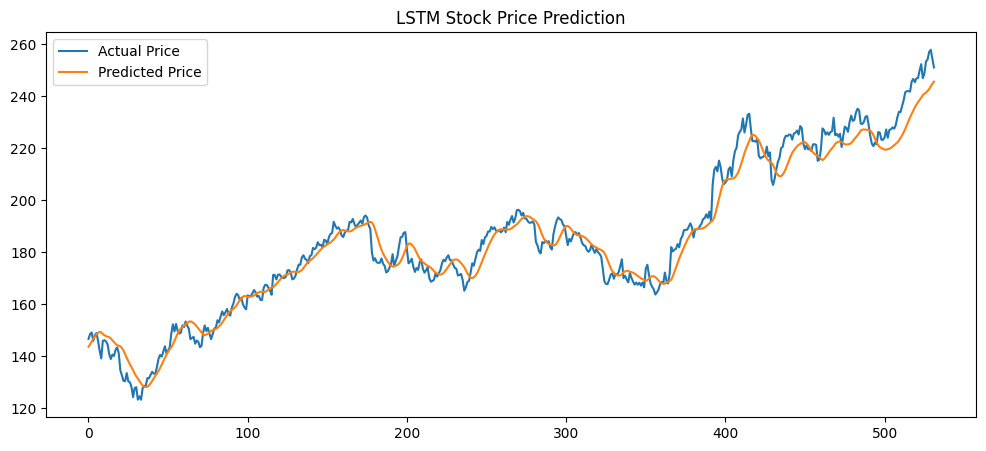

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(y_test_actual, label="Actual Price")
plt.plot(predictions, label="Predicted Price")
plt.legend()
plt.title("LSTM Stock Price Prediction")
plt.show()


In [59]:
#now we clearly see that Predictions follow the trend
#Slight lag (normal for LSTM)
#So here we clearly see that the deep learning model i.e LSTM that predicts accurate result as 99%
#because as we see the above graph of actual price and predicted price is denote the good accuracy of predicted price

In [60]:
# Take only the last rows of the original dataframe
# The number of rows is equal to the number of predictions made by the model
# This aligns actual prices with predicted prices
df_signals = df.iloc[-len(predictions):].copy()

# Add a new column that stores the predicted closing prices
# flatten() converts predictions into a 1D array
df_signals['Predicted_Close'] = predictions.flatten()

# Create a new column called 'Signal'
# Initialize all values with 0 (means: No Buy / Hold)
df_signals['Signal'] = 0

# If the predicted closing price is greater than the current closing price,
# mark that day as a Buy signal (1)
df_signals.loc[
    df_signals['Predicted_Close'] > df_signals[('Close', 'AAPL')],
    'Signal'
] = 1

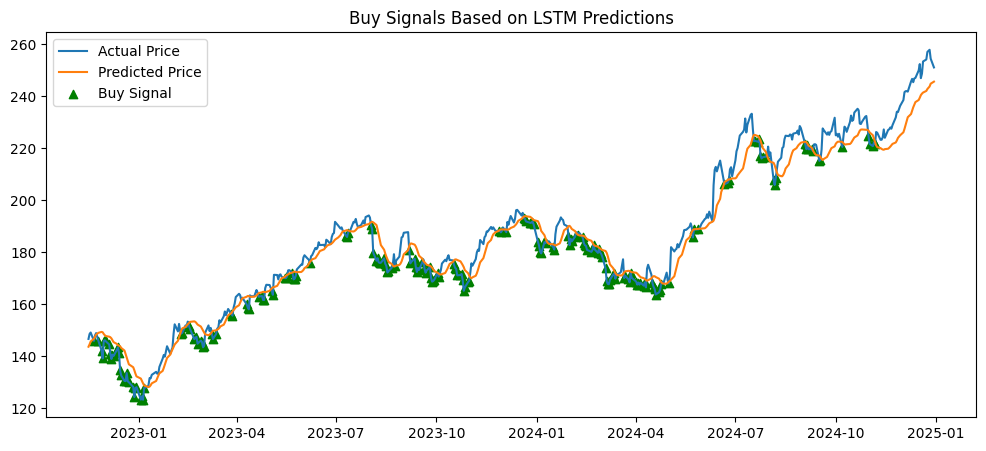

In [61]:
#Now the last step i.e the actual graph ploting of the model
import matplotlib.pyplot as plt

# Create a new figure with a fixed size
plt.figure(figsize=(12, 5))

# Plot the actual closing prices
plt.plot(
    df_signals['Close'],
    label='Actual Price'
)

# Plot the predicted closing prices from the LSTM model
plt.plot(
    df_signals['Predicted_Close'],
    label='Predicted Price'
)

# Select only the rows where the model generated a Buy signal (Signal == 1)
buy_signals = df_signals[df_signals['Signal'] == 1]

# Plot Buy signals as green upward triangles on the actual price curve
plt.scatter(
    buy_signals.index,      # Dates where Buy signal occurred
    buy_signals['Close'],   # Actual closing price at those dates
    marker='^',             # Upward triangle marker (represents Buy)
    color='green',
    label='Buy Signal'
)

# Show legend to identify lines and markers
plt.legend()

# Add a title to the plot
plt.title("Buy Signals Based on LSTM Predictions")

# Display the plot
plt.show()
